In [1]:
import numpy as np
import pandas as pd
import xarray as xr
from matplotlib import pyplot as plt


In [29]:
M = 0.8 #change later
FT = 10 #change later
gamma = 1.4
R = 287.05


In [2]:
climate_data = xr.open_dataset("C:/Users/macie/OneDrive/Desktop/Project_A02/Project_data/f100___________20171202_0000_ECHAM5.nc")

#get the data
temperature = climate_data.variables['tm1']
density = climate_data.variables['rho_air_dry']
time = climate_data.coords['time']
lon = climate_data.coords['lon']
lat = climate_data.coords['lat']
lev = climate_data.coords['lev']

#take a mean value over the whole month for each position
temperature_values = xr.DataArray.mean(temperature, axis=0)
density_values = xr.DataArray.mean(density, axis=0)

In [16]:
velocity = xr.DataArray(M * np.sqrt(temperature_values.data*gamma*R), dims=("lev","lat","lon"))

In [13]:
temperature_values

<xarray.Variable (lev: 31, lat: 64, lon: 128)>
array([[[206.1495 , 206.07509, 206.00507, ..., 206.39641, 206.3104 ,
         206.22797],
        [203.75697, 203.57307, 203.39844, ..., 204.35742, 204.14981,
         203.94939],
        [201.50797, 201.21713, 200.94043, ..., 202.45442, 202.12772,
         201.81186],
        ...,
        [250.53497, 250.5066 , 250.47952, ..., 250.62814, 250.5958 ,
         250.56474],
        [251.01408, 250.99368, 250.97414, ..., 251.08006, 251.0573 ,
         251.03531],
        [251.33015, 251.3202 , 251.31056, ..., 251.36133, 251.35075,
         251.34035]],

       [[206.72594, 206.65138, 206.58092, ..., 206.97153, 206.88623,
         206.80428],
        [204.63646, 204.4601 , 204.29248, ..., 205.2134 , 205.01366,
         204.82118],
        [202.71547, 202.44644, 202.19096, ..., 203.59654, 203.29132,
         202.99736],
...
        [252.60039, 252.16325, 251.7118 , ..., 253.94945, 253.48209,
         253.0359 ],
        [249.42354, 249.09404, 248.75995, ..., 250.403  , 250.07616,
         249.7502 ],
        [245.22758, 245.13359, 245.04054, ..., 245.5113 , 245.4168 ,
         245.32208]],

       [[255.81645, 255.78299, 255.74107, ..., 255.86826, 255.85881,
         255.84169],
        [258.379  , 258.5418 , 258.65738, ..., 257.6378 , 257.92307,
         258.1716 ],
        [262.06186, 262.65866, 263.13583, ..., 259.60178, 260.5246 ,
         261.34824],
        ...,
        [250.50291, 250.14606, 249.7788 , ..., 251.66017, 251.24593,
         250.86464],
        [247.53711, 247.25746, 246.97409, ..., 248.38705, 248.09866,
         247.8164 ],
        [243.19122, 243.08461, 242.98042, ..., 243.52419, 243.41118,
         243.30013]]], dtype=float32)

In [17]:
velocity

<xarray.DataArray (lev: 31, lat: 64, lon: 128)>
array([[[230.26286, 230.22131, 230.18217, ..., 230.40071, 230.3527 ,
         230.30669],
        [228.92278, 228.81946, 228.7213 , ..., 229.25984, 229.14336,
         229.03087],
        [227.65588, 227.49153, 227.33507, ..., 228.1899 , 228.00569,
         227.8275 ],
        ...,
        [253.84402, 253.82967, 253.81595, ..., 253.89124, 253.87483,
         253.85912],
        [254.08662, 254.0763 , 254.06644, ..., 254.12003, 254.1085 ,
         254.09737],
        [254.24657, 254.24153, 254.23665, ..., 254.26231, 254.25696,
         254.25171]],

       [[230.5846 , 230.543  , 230.5037 , ..., 230.72151, 230.67395,
         230.62828],
        [229.41629, 229.31743, 229.22342, ..., 229.73949, 229.62764,
         229.51982],
        [228.33696, 228.18541, 228.04137, ..., 228.83264, 228.66106,
         228.49565],
...
        [254.88823, 254.66759, 254.4395 , ..., 255.56798, 255.33267,
         255.10786],
        [253.28035, 253.11299, 252.94319, ..., 253.77718, 253.61148,
         253.44615],
        [251.1409 , 251.09276, 251.04509, ..., 251.28613, 251.23775,
         251.18929]],

       [[256.5057 , 256.48892, 256.4679 , ..., 256.53168, 256.52695,
         256.51837],
        [257.7872 , 257.8684 , 257.92606, ..., 257.4172 , 257.55966,
         257.68375],
        [259.61792, 259.9134 , 260.14938, ..., 258.39648, 258.85535,
         259.26422],
        ...,
        [253.82779, 253.64693, 253.46068, ..., 254.41344, 254.20396,
         254.01099],
        [252.32072, 252.17815, 252.03362, ..., 252.75354, 252.60677,
         252.46304],
        [250.09598, 250.04117, 249.98755, ..., 250.26714, 250.20906,
         250.15198]]], dtype=float32)
Dimensions without coordinates: lev, lat, lon

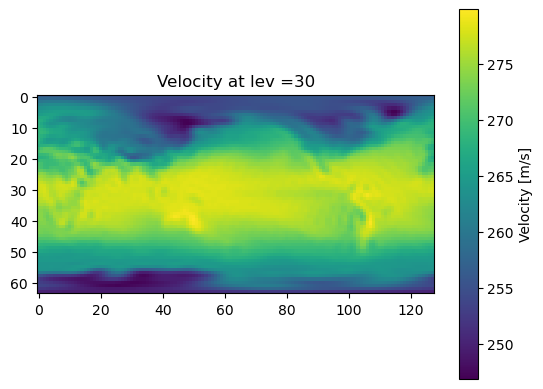

In [35]:
lev = 30
velocity_test = velocity[lev,:,:]
plt.imshow(velocity_test, interpolation="nearest")
plt.colorbar(label = "Velocity [m/s]")
plt.title("Velocity at lev =" + str(lev))
plt.show()

In [31]:
fuel_per_km = xr.DataArray(FT*1000/(velocity.data), dims=("lev","lat","lon"))

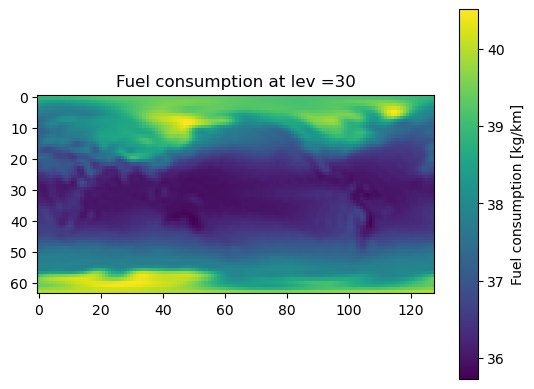

In [34]:
lev = 30
fuel_per_km_test = fuel_per_km[lev,:,:]
plt.imshow(fuel_per_km_test, interpolation="nearest")
plt.colorbar(label = "Fuel consumption [kg/km]")
plt.title("Fuel consumption at lev =" + str(lev))
plt.show()